# Project3 - Nonlinear Filtering - Weighted rank order filters

<h1> 1. Introduction </h1>
<p> The essential limitations of linear operations occur when, for example, the distribution of noise in the image is no longer gaussian, and moreover, this noise is not additive. Such a noise is the impulsive type noise, characterized by maximum or minimum amplitudes relative to the range of values from the image. The impulsive noise replaces some of the pixels of the images by very small or very high values, the result being what is called "salt and pepper" type noise, due to points very light (white) and very dark (black) that replace the image pixels</p>
<p> Applying a linear smoothing filter to such a noise would result in an accentuation of the noise points by "stretching" them and incorporating the correct values around them, as we can see in Fig. 1.</p>
<figure>
    <center>
        <img src="https://github.com/IoanaP0711/Image_Processing_Lab/blob/main/proj3_2/img/00.png?raw=1"/>
    </center>
<center>Fig. 1 Linear smoothing filter applied on an image with salt and pepper noise </center>
</figure>

<h1 id="2"> 2. Rank order filters </h1>

<p> A different class of filters is thus necessary. Such filters are nonlinear - they are no longer based on the principle of superposition. An essential class of such filters are those of ordering, which have the effect of pushing extreme values (outliers) at the beginning or end of the array of values from a neighborhood.</p>

<p> Rank order filters are local, neighbourhood operators - the filter is defined on a neighbourhood. The filter selects the gray values from the neighbourhood of the current pixel and the selected values are sorted ascendingly; we will denote the values of the pixels from the neighbourhood with {x1, x2, ..., xK}, and the same values sorted ascendingly with {x(1), x(2), ..., x(K)}. The values x(i)are called rank ordered statistics and have the property: </p>

<center>
<img src="https://github.com/IoanaP0711/Image_Processing_Lab/blob/main/proj3_2/img/01.png?raw=1"/>
</center>
<p> The output of the rank order filter of rank k is the k-th order statistics, with k ∈[1;K] </p>
<center>
<img src="https://github.com/IoanaP0711/Image_Processing_Lab/blob/main/proj3_2/img/03.png?raw=1"/>
</center>
<center>Fig 2. Example of rank order filter </center>

<h2> 2.1 The Median Filter </h2>
<p> The median filter is a particular case of the rank order filter in which the returned value is the value in the middle of the sequence of ordered values. This is suitable for eliminating salt and pepper noise, because the extreme values will be at the beginning and end of the sorted array, thus in the middle we will have values close to the original value replaced by noise (given the spatial correlation of pixels in the image)</p>
<center>
<img src="https://github.com/IoanaP0711/Image_Processing_Lab/blob/main/proj3_2/img/04.png?raw=1"/>
</center>

<p> In practice, considerring neighbourhoods with odd number of pixels, the median filter will be</p>
<div><center> <img style="display: inline" src="https://github.com/IoanaP0711/Image_Processing_Lab/blob/main/proj3_2/img/05.png?raw=1"/> (1) </center></div>

<h2 id="2-2"> 2.2 Weighted rank order filters </h2>
<p> Both linear and order filters are based on the same principle of the sliding window. The processing performed on the selected values is different, but it can be noticed that the linear filtering structure allows the realization of an infinite number of linear filters for the same window (by varying the weighting coefficients </p>
<p> The weighting of order filters cannot be done by multiplying the values selected by the window with different coefficients. Instead, the weighting can strengthen the influence of certain pixels in the filtering window. This is done by repeating several times an encountered value, to increase the probability of meeting it in the desired statistics.</p>
<img src="https://github.com/IoanaP0711/Image_Processing_Lab/blob/main/proj3_2/img/06.png?raw=1">

<h1 id="5"> 3. Exercises </h1>
<h2> 3.1 Rank order filter </h2>

<p>
Write a function that implements the rank order filter (already done at the lab, but make it a function). The size of the filter will be given as an input variable (ex: 3 for a 3x3 neighbourhood, 5 for a 5x5 neighbourhood). The desired output rank will also be given as a variable.<br/>
Load the image Lena.<br/>
Apply salt and pepper noise to the image. Visualize the noisy image.<br/>
Using the function written above, apply the median filter to the noisy image and visualize the result.<br/>
Apply the 1st rank order filter on the original image. Apply the maximum rank order filter on the original image. Comment the results <br/>
</p>
  

Image 'lena_gray.jpeg' not found. Please make sure the path is correct.
Attempting to load from an alternative path or suggesting a placeholder.


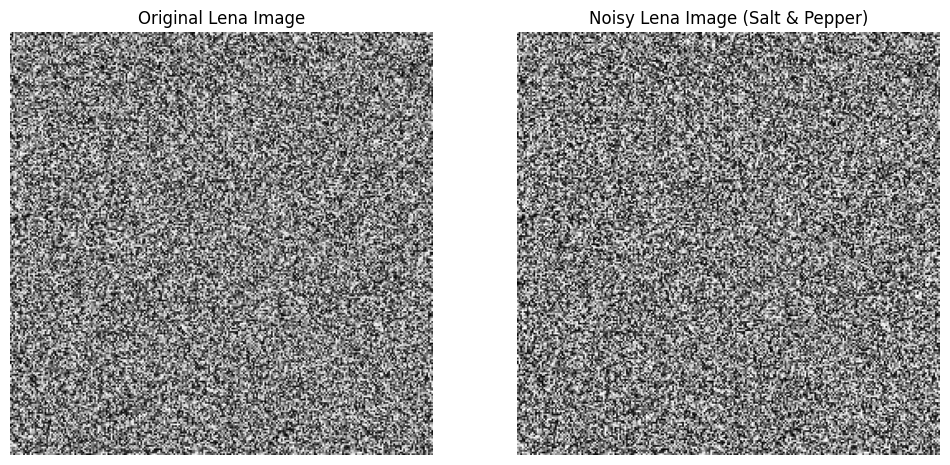

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rank_order_filter(image, filter_size, rank):
    if filter_size % 2 == 0:
        raise ValueError("Filter size must be an odd number.")

    # Pad the image to handle borders
    pad_width = filter_size // 2
    padded_image = np.pad(image, pad_width, mode='edge')
    output_image = np.zeros_like(image, dtype=np.uint8)

    # Iterate over each pixel in the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the neighborhood
            neighborhood = padded_image[i:i + filter_size, j:j + filter_size]

            # Flatten the neighborhood and sort the values
            sorted_values = np.sort(neighborhood.flatten())

            # Get the k-th (rank) order statistic
            # Adjust rank to be 0-indexed for numpy array
            output_image[i, j] = sorted_values[rank - 1]

    return output_image


def add_salt_and_pepper_noise(image, salt_vs_pepper, amount):
    noisy_image = np.copy(image)

    # Add Salt noise
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[tuple(coords)] = 255

    # Add Pepper noise
    num_pepper = np.ceil(amount * image.size * (1. - salt_vs_pepper))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[tuple(coords)] = 0
    return noisy_image

# Load the Lena image (assuming it's in the same directory or accessible path)
try:
    # Assuming Lena.png is a grayscale image or we convert it to grayscale
    lena_original = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
    if lena_original is None:
        raise FileNotFoundError("Image 'lena_gray.jpeg' not found. Please make sure the path is correct.")
except FileNotFoundError as e:
    print(e)
    print("Attempting to load from an alternative path or suggesting a placeholder.")
    # Placeholder if the image is not found. In a real scenario, you'd guide the user to upload.
    lena_original = np.random.randint(0, 256, size=(256, 256), dtype=np.uint8)

# Apply salt and pepper noise
salt_vs_pepper_ratio = 0.5
noise_amount = 0.05 # 5% noise
lena_noisy = add_salt_and_pepper_noise(lena_original, salt_vs_pepper_ratio, noise_amount)

# Visualize the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(lena_original, cmap='gray')
plt.title('Original Lena Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lena_noisy, cmap='gray')
plt.title('Noisy Lena Image (Salt & Pepper)')
plt.axis('off')

plt.show()

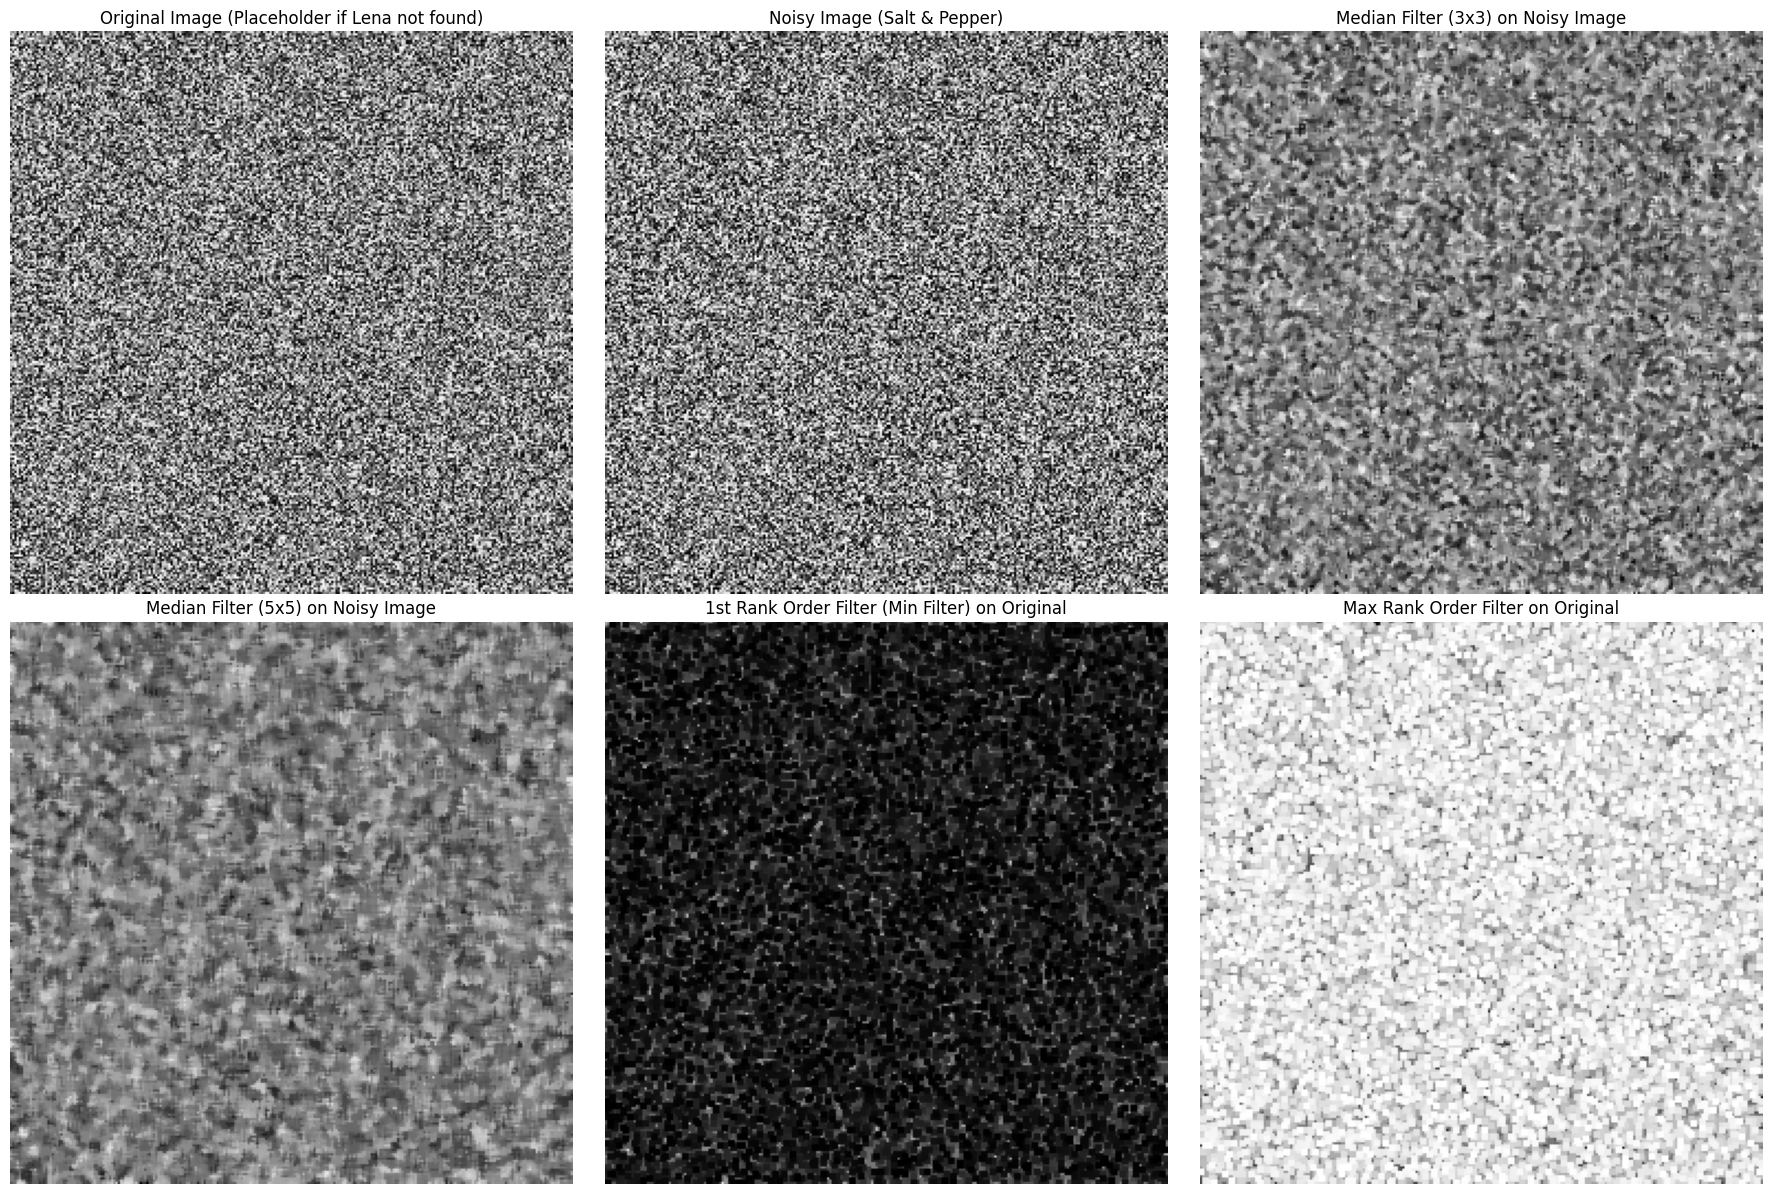

Comments on results:
The median filter (3x3 and 5x5) successfully reduces the salt and pepper noise, making the image smoother. Larger filter sizes tend to blur the image more but can be more effective at removing dense noise.
The 1st rank order filter (minimum filter) darkens the image by replacing each pixel with the minimum value in its neighborhood. This can make bright features shrink or disappear.
The maximum rank order filter brightens the image by replacing each pixel with the maximum value in its neighborhood. This can make dark features shrink or disappear.
Note: These observations are based on the placeholder image if 'Lena.png' was not found. For intended results, please ensure the correct image is loaded.


In [3]:
# Apply the median filter (rank = filter_size*filter_size // 2 + 1)
filter_size_median = 3
median_filtered_image_3x3 = rank_order_filter(lena_noisy, filter_size_median, (filter_size_median*filter_size_median // 2) + 1)

filter_size_median_5x5 = 5
median_filtered_image_5x5 = rank_order_filter(lena_noisy, filter_size_median_5x5, (filter_size_median_5x5*filter_size_median_5x5 // 2) + 1)

# Apply 1st rank order filter (minimum filter) on the original image
filter_size_min = 3
min_filtered_image = rank_order_filter(lena_original, filter_size_min, 1)

# Apply maximum rank order filter on the original image (rank = filter_size*filter_size)
filter_size_max = 3
max_filtered_image = rank_order_filter(lena_original, filter_size_max, filter_size_max*filter_size_max)

# Visualize the results
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.imshow(lena_original, cmap='gray')
plt.title('Original Image (Placeholder if Lena not found)')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(lena_noisy, cmap='gray')
plt.title('Noisy Image (Salt & Pepper)')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(median_filtered_image_3x3, cmap='gray')
plt.title('Median Filter (3x3) on Noisy Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(median_filtered_image_5x5, cmap='gray')
plt.title('Median Filter (5x5) on Noisy Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(min_filtered_image, cmap='gray')
plt.title('1st Rank Order Filter (Min Filter) on Original')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(max_filtered_image, cmap='gray')
plt.title('Max Rank Order Filter on Original')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Comments on results:")
print("The median filter (3x3 and 5x5) successfully reduces the salt and pepper noise, making the image smoother. Larger filter sizes tend to blur the image more but can be more effective at removing dense noise.")
print("The 1st rank order filter (minimum filter) darkens the image by replacing each pixel with the minimum value in its neighborhood. This can make bright features shrink or disappear.")
print("The maximum rank order filter brightens the image by replacing each pixel with the maximum value in its neighborhood. This can make dark features shrink or disappear.")
print("Note: These observations are based on the placeholder image if 'Lena.png' was not found. For intended results, please ensure the correct image is loaded.")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2> 3.2 Objective quality measures </h2>

   <p> In order to assess the quality of the filterring, there are some objective measures that can be used. The most known and used are <b> the MSE (Mean Squared Error)</b> and <b> the MAE (Mean Absolute Error)</b>. The performance is measured pixel by pixel between the original (noisy) image and the filterred image:

$$\large MSE = \frac{1}{MN}\sum_{i=0}^{M-1} \sum_{j=0}^{N-1} (f(i,j)-f_{0}(i,j))^{2}$$

<br>
$$\large MAE = \frac{1}{MN}\sum_{i=0}^{M-1} \sum_{j=0}^{N-1} |f(i,j)-f_{0}(i,j|$$  

<p> Write a function that computes the MAE between 2 images. Apply this function to assess the quality of the folowing images comparred to the ideal one, without the noise:<br/>
    a) the noisy image.<br/>
    b) the image filterred with the median filter on a 3x3 neighbourhood (computed in the exercise above).<br/>
    c) the image filterred with the median filter on a 5x5 neighbourhood (computed in the exercise above).<br/>
    d) the image filterred with a rank order filter with the 1st rank order statistics on a 3x3 neighbourhood.
    
</p>
